In [31]:
import img_utils
import naive_bayes
import logistic_regression
import matplotlib.pyplot as plt
from tqdm import tqdm
from pprint import pprint
import pandas as pd
import matplotlib

%matplotlib inline

# plt.style.use('ggplot')

In [17]:
# load data
data = img_utils.load_dataset()

100%|██████████| 2269/2269 [00:21<00:00, 103.18it/s]


In [3]:
sizes = [1, 2, 4, 8, 16, 32, 64, 128]

In [4]:
metrics_nb = {label: {'mean':[], 'std':[]} for label in ['fit_time', 'score_time', 'test_score', 'train_score']}

for size in sizes:
    data_resize = img_utils.downsize_set(data, size)
    train, test = img_utils.stack(data_resize)
    model = naive_bayes.NaiveBayes()
    model.evaluate(train, test)
    pprint(model.metrics)
    for key in model.metrics:
        metrics_nb[key]['mean'].append(model.metrics[key].mean())
        metrics_nb[key]['std'].append(model.metrics[key].std())


{'fit_time': array([0.00837231, 0.00785422, 0.00676084]),
 'score_time': array([0.00282598, 0.0028348 , 0.00189424]),
 'test_score': array([0.56142668, 0.57142857, 0.56613757]),
 'train_score': array([0.56531085, 0.56278916, 0.56807667])}
{'fit_time': array([0.00508213, 0.00431585, 0.00741816]),
 'score_time': array([0.00316286, 0.01343107, 0.00444698]),
 'test_score': array([0.57859974, 0.58300265, 0.57638889]),
 'train_score': array([0.5787037 , 0.57931262, 0.58360872])}
{'fit_time': array([0.00668168, 0.00735998, 0.00798917]),
 'score_time': array([0.0041182 , 0.00704408, 0.00545478]),
 'test_score': array([0.6003963 , 0.60482804, 0.60085979]),
 'train_score': array([0.59986772, 0.60095836, 0.60442829])}
{'fit_time': array([0.03199792, 0.48801994, 0.38190413]),
 'score_time': array([0.20535302, 0.03947282, 0.04806972]),
 'test_score': array([0.62153236, 0.61507937, 0.6167328 ]),
 'train_score': array([0.61574074, 0.61731659, 0.61996034])}
{'fit_time': array([0.12906122, 0.11848974, 

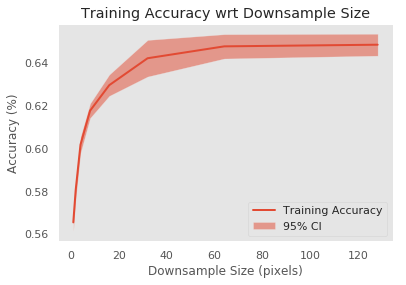

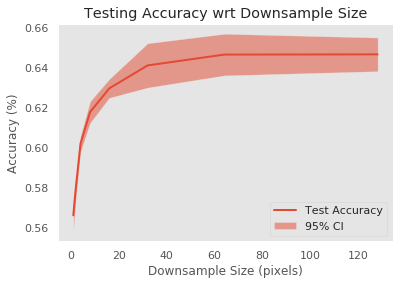

In [32]:
img_utils.lineplot(sizes, metrics_nb['train_score']['mean'], metrics_nb['train_score']['std'], label="Training Accuracy", title="Training Accuracy wrt Downsample Size")
img_utils.lineplot(sizes, metrics_nb['test_score']['mean'], metrics_nb['test_score']['std'], label="Test Accuracy", title="Testing Accuracy wrt Downsample Size")

In [6]:
metrics_lr = {label: {'mean':[], 'std':[]} for label in ['fit_time', 'score_time', 'test_score', 'train_score']}

for size in sizes:
    data_resize = img_utils.downsize_set(data, size)
    train, test = img_utils.stack(data_resize)
    model = logistic_regression.LogisticRegression()
    model.evaluate(train, test)
    pprint(model.metrics)
    for key in model.metrics:
        metrics_lr[key]['mean'].append(model.metrics[key].mean())
        metrics_lr[key]['std'].append(model.metrics[key].std())

{'fit_time': array([0.33073568, 0.31301618, 0.31203818]),
 'score_time': array([0.00226927, 0.00366116, 0.00322485]),
 'test_score': array([0.48910172, 0.5297619 , 0.52116402]),
 'train_score': array([0.51421958, 0.51173166, 0.51470588])}
{'fit_time': array([0.31578183, 0.21955204, 0.31700826]),
 'score_time': array([0.00172591, 0.00138712, 0.00169802]),
 'test_score': array([0.54260238, 0.54332011, 0.54001323]),
 'train_score': array([0.54877646, 0.54923992, 0.55337079])}
{'fit_time': array([0.43168712, 0.42439604, 0.43888497]),
 'score_time': array([0.002316  , 0.00278616, 0.00258708]),
 'test_score': array([0.65785997, 0.65013228, 0.66832011]),
 'train_score': array([0.6671627 , 0.66870456, 0.66159947])}
{'fit_time': array([0.87514019, 0.84782124, 0.76409197]),
 'score_time': array([0.00390887, 0.00722885, 0.00728893]),
 'test_score': array([0.69319683, 0.69179894, 0.69378307]),
 'train_score': array([0.71031746, 0.70654329, 0.70621282])}
{'fit_time': array([3.56402326, 3.56819582, 

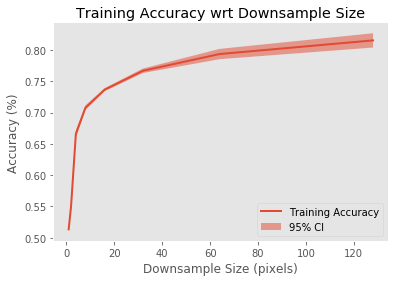

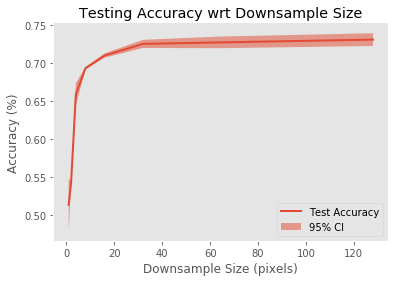

In [19]:
img_utils.lineplot(sizes, metrics_lr['train_score']['mean'], metrics_lr['train_score']['std'], label="Training Accuracy", title="Training Accuracy wrt Downsample Size")
img_utils.lineplot(sizes, metrics_lr['test_score']['mean'], metrics_lr['test_score']['std'], label="Test Accuracy", title="Testing Accuracy wrt Downsample Size")

In [8]:
metrics_nb_df = pd.DataFrame.from_dict({f'{label}_{sub_label}': metrics_nb[label][sub_label] for label in metrics_nb for sub_label in metrics_nb[label]})
metrics_nb_df = metrics_nb_df.rename({i: 2**i for i in range(9)}, axis='index')
metrics_nb_df.to_csv('nb_data.csv')

In [9]:
metrics_lr_df = pd.DataFrame.from_dict({f'{label}_{sub_label}': metrics_lr[label][sub_label] for label in metrics_lr for sub_label in metrics_lr[label]})
metrics_lr_df = metrics_lr_df.rename({i: 2**i for i in range(9)}, axis='index')
metrics_lr_df.to_csv('lr_data.csv')

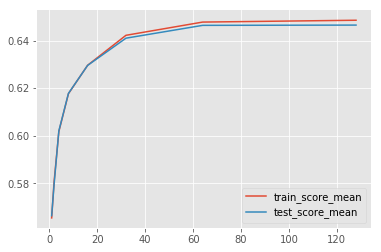

In [20]:
metrics_nb_df[['train_score_mean', 'test_score_mean']].plot()

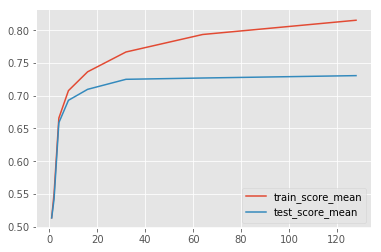

In [21]:
metrics_lr_df[['train_score_mean', 'test_score_mean']].plot()

In [12]:
metrics_lr_df

,fit_time_mean,fit_time_std,score_time_mean,score_time_std,test_score_mean,test_score_std,train_score_mean,train_score_std
1,0.318597,0.008593,0.003052,0.000581,0.513343,0.017497,0.513552,0.001303
2,0.284114,0.045655,0.001604,0.000154,0.541979,0.001420,0.550462,0.002065
4,0.431656,0.005915,0.002563,0.000193,0.658771,0.007453,0.665822,0.003052
8,0.829018,0.047245,0.006142,0.001579,0.692926,0.000832,0.707691,0.001862
16,3.551041,0.021378,0.022153,0.007552,0.709674,0.001412,0.736448,0.001214
32,14.743428,0.130998,0.111561,0.006194,0.724987,0.002745,0.766693,0.001816
64,52.732895,0.451572,0.479766,0.060650,0.726973,0.003889,0.793412,0.004198
128,1408.560127,13.421301,2.562420,1.511227,0.730606,0.004279,0.815172,0.005828


In [13]:
metrics_nb_df

,fit_time_mean,fit_time_std,score_time_mean,score_time_std,test_score_mean,test_score_std,train_score_mean,train_score_std
1,0.007662,0.000672,0.002518,0.000441,0.566331,0.004086,0.565392,0.002159
2,0.005605,0.001319,0.007014,0.004568,0.579330,0.002749,0.580542,0.002183
4,0.007344,0.000534,0.005539,0.001196,0.602028,0.001989,0.601751,0.001944
8,0.300641,0.194836,0.097632,0.076251,0.617782,0.002737,0.617673,0.001741
16,0.123467,0.004338,0.115168,0.006077,0.629571,0.002397,0.629627,0.002550
32,2.282713,0.040705,0.499451,0.037777,0.641028,0.005638,0.642242,0.004375
64,7.093280,0.130207,2.822970,0.054196,0.646427,0.005298,0.647807,0.002910
128,71.114019,0.002085,38.197773,13.548059,0.646538,0.004278,0.648578,0.002618


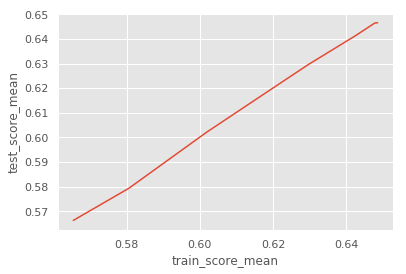